# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [180]:
#import dataset
crime=pd.read_csv("D:\\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [181]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [182]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [183]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [184]:
crime=crime.drop(labels='Unnamed: 0',axis=1)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [185]:
#Normalize function
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [186]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(crime.iloc[:,0:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


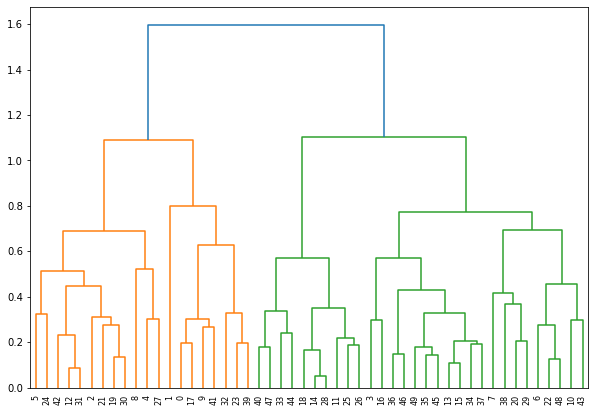

In [187]:
#create dendogram
plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(df_norm,'complete','euclidean'))

In [188]:
#create Cluster
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [189]:
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [190]:
clusters.value_counts()

clusters
1           20
3           12
2           10
0            8
dtype: int64

In [191]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [192]:
crime['h_clusterid']=y_hc
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [193]:
crime[crime['h_clusterid']==0]

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
9,17.4,211,60,25.8,0
17,15.4,249,66,22.2,0
23,16.1,259,44,17.1,0
32,13.0,337,45,16.1,0
39,14.4,279,48,22.5,0
41,13.2,188,59,26.9,0


In [194]:
crime[crime['h_clusterid']==1]

,Murder,Assault,UrbanPop,Rape,h_clusterid
3,8.8,190,50,19.5,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
10,5.3,46,83,20.2,1
13,7.2,113,65,21.0,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
20,4.4,149,85,16.3,1
22,2.7,72,66,14.9,1
29,7.4,159,89,18.8,1


In [195]:
crime[crime['h_clusterid']==2]

,Murder,Assault,UrbanPop,Rape,h_clusterid
11,2.6,120,54,14.2,2
14,2.2,56,57,11.3,2
18,2.1,83,51,7.8,2
25,6.0,109,53,16.4,2
26,4.3,102,62,16.5,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2
40,3.8,86,45,12.8,2
44,2.2,48,32,11.2,2
47,5.7,81,39,9.3,2


In [196]:
crime.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


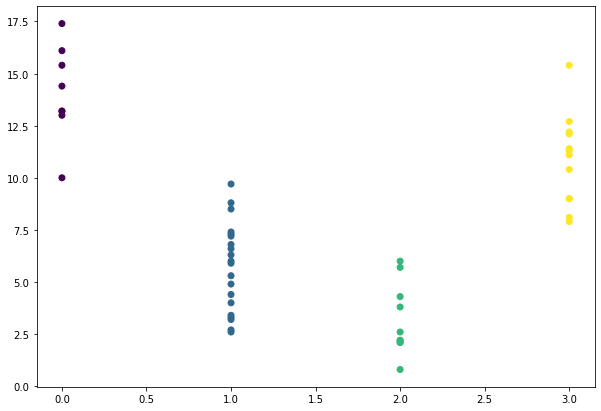

In [197]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['h_clusterid'],crime['Murder'],c=y_hc)

#### 2 clusters Breakdown Predict the Best Clustering model

## Kmeans

In [198]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [199]:
crime1=pd.read_csv('D:\\crime_data.csv')
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [200]:
# Similar to the sklearn.preprocessing, MinMaxScaler function
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [201]:
# Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [202]:
x=norm_func(crime1.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


In [207]:
scaler = StandardScaler()
scaled_crime1 = scaler.fit_transform(crime1.iloc[:,1:])

In [208]:
scaled_crime1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

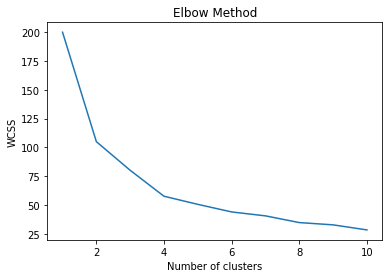

In [209]:
#ELBOW CHART
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [210]:
# Build Cluster algorithm using K=4

In [211]:
cluster_4=KMeans(4,random_state=0)
cluster_4.fit(scaled_crime1)

KMeans(n_clusters=4, random_state=0)

In [212]:
cluster_4.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [213]:
# Assign clusters to the data set
crime2=crime1.copy()
crime2['clusters4id']=cluster_4.labels_
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters4id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [214]:
# Compute the centroids for K=4 clusters with 11 variables
cluster_4.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [215]:
# Group data by Clusters (K=4)
crime2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


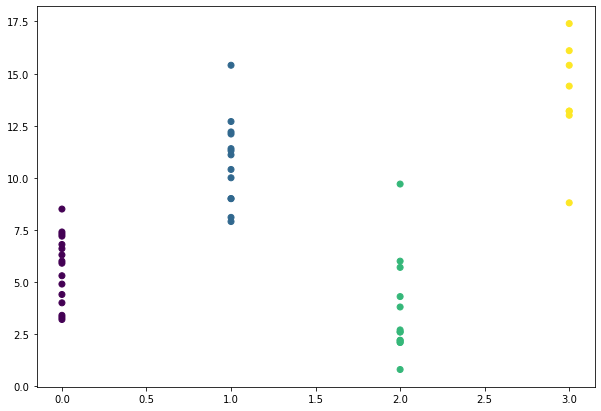

In [216]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clusters4id'],crime2['Murder'], c=cluster_4.labels_)

In [217]:
crime2['clusters4id']=crime2['clusters4id'].replace(0, 'Cluster 1')
crime2['clusters4id']=crime2['clusters4id'].replace(1, 'Cluster 2')
crime2['clusters4id']=crime2['clusters4id'].replace(2, 'Cluster 3')
crime2['clusters4id']=crime2['clusters4id'].replace(3, 'Cluster 4')
crime2['clusters4id']=crime2['clusters4id'].replace(4, 'Cluster 5')
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters4id
0,Alabama,13.2,236,58,21.2,Cluster 4
1,Alaska,10.0,263,48,44.5,Cluster 2
2,Arizona,8.1,294,80,31.0,Cluster 2
3,Arkansas,8.8,190,50,19.5,Cluster 4
4,California,9.0,276,91,40.6,Cluster 2
5,Colorado,7.9,204,78,38.7,Cluster 2
6,Connecticut,3.3,110,77,11.1,Cluster 1
7,Delaware,5.9,238,72,15.8,Cluster 1
8,Florida,15.4,335,80,31.9,Cluster 2
9,Georgia,17.4,211,60,25.8,Cluster 4


#### from elbow chart we can predict 4 cluster breakdown is the best model prediction for clustering.

# DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
#import dataset
crime2=pd.read_csv("D:\\crime_data.csv")
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [15]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [16]:
crime2.drop(['Unnamed: 0'],axis=1,inplace=True)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [17]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime2_norm=StandardScaler().fit_transform(crime2)
crime2_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [79]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=6)
dbscan.fit(crime2_norm)

DBSCAN(eps=1, min_samples=6)

In [80]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [81]:
# Adding clusters to dataset
crime2['clusters']=dbscan.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [82]:
crime2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.992857,221.785714,69.392857,25.621429
1,0,4.981818,105.818182,60.636364,15.645455


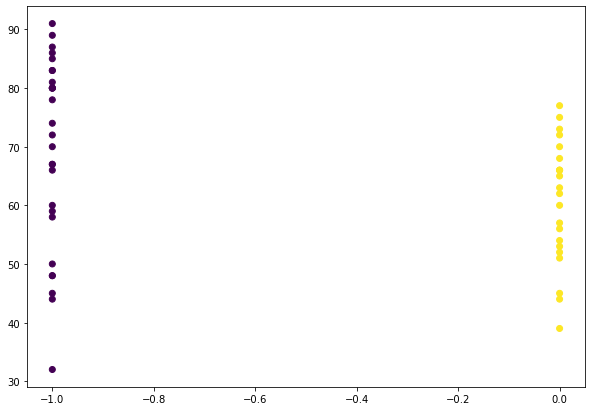

In [83]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clusters'],crime2['UrbanPop'], c=dbscan.labels_) 

In [84]:
from sklearn import metrics
score=metrics.silhouette_score(crime2_norm,dbscan.labels_)
score

0.2552597448455229

## silhouette_score

In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
nc=[2,3,4,5,6,7,8,9,10,11]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(crime2.iloc[:,:6])
    iner.append(sil(crime2.iloc[:,:6],y))

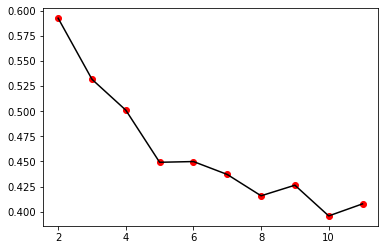

In [29]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

## calinski_harabaz_score

In [33]:
from sklearn.metrics import calinski_harabasz_score as chs
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(crime2.iloc[:,:6])
    iner.append(chs(crime2.iloc[:,:6],y))

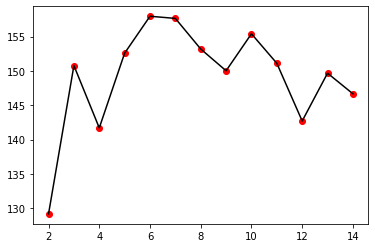

In [34]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [85]:
# cluster  6 & 7  predict  the good calinski_harabaz_score